## **Definição do problema**

<div align ='justify'> <p>Os sistemas de compartilhamento de bicicletas têm se destacado como tendência nos grandes centros urbanos, pois desempenham um papel importante na mobilidade urbana, além da contribuição em questões ambientais e de saúde. Sabe-se que o processo de aluguel de bicicletas está correlacionado com as condições ambientais, como por exemplo, condições climáticas, precipitação, dia da semana, hora do dia, etc.</p>
<p>Dessa forma, pretende-se estimar a previsão do uso de bicicletas alugadas utilizando uma base de dados desenvolvida por professor PhD Hadi Fanaee-T, do Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto. Nessa base de dados está contido o registro histórico de dois anos correspondente a 2011 e 2012 do sistema Capital Bikeshare de Washington D.C, USA.</p></div>

##**Resolução**

###**Etapa 1 - Importação das bibliotecas**

In [ ]:
# Verificação da versão do TensorFlow e importação das bibliotecas para manipulação dos dados
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

###**Etapa 2 - Importação da base de dados**

In [ ]:
# Importação da base de dados
bike = pd.read_csv('bike-sharing-daily.csv')

In [ ]:
# Visualização da base de dados
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [ ]:
# Informações da base de dados
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [ ]:
# Descrição da base de dados
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###**Etapa 3 - Limpeza da base de dados**

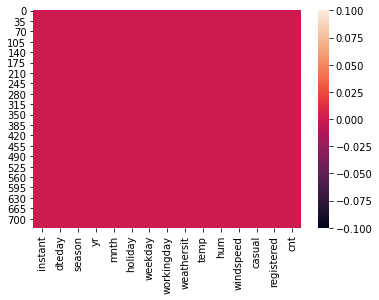

In [ ]:
# Visualização para verificar se há dados nulos
sns.heatmap(bike.isnull());

Não há dados faltantes

In [ ]:
# Deletar a coluna com identificador
bike = bike.drop(labels=['instant'], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros da base de dados
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [ ]:
# Deletar a coluna 'casual' e 'registered', pois utilizaremos a coluna 'cnt' que é a soma dessas colunas
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros da base de dados
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [ ]:
# Converter a coluna 'dteday' para formato Data
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [ ]:
# Visualizar os 5 primeiros registros da base de dados
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [ ]:
# Definir a coluna 'dteday' como índice da base de dados
bike.index = pd.DatetimeIndex(bike.dteday)

In [ ]:
# Visualizar os 5 primeiros registros da base de dados
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [ ]:
# Deletar a coluna 'dteday' 
bike = bike.drop(labels=['dteday'], axis=1)

In [ ]:
# Visualizar os 5 primeiros registros da base de dados
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


###**Etapa 4 - Visualização da base de dados**

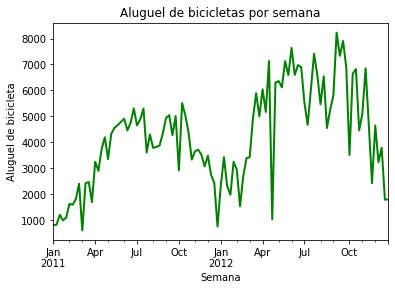

In [ ]:
# Visualização do aluguel de bicicletas por semana
bike['cnt'].asfreq('W').plot(linewidth = 2, color = 'green')
plt.title('Aluguel de bicicletas por semana')
plt.xlabel('Semana')
plt.ylabel('Aluguel de bicicleta');

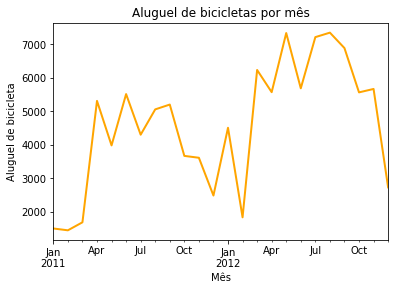

In [ ]:
# Visualização do aluguel de bicicletas por mês
bike['cnt'].asfreq('M').plot(linewidth = 2, color = 'orange')
plt.title('Aluguel de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Aluguel de bicicleta');

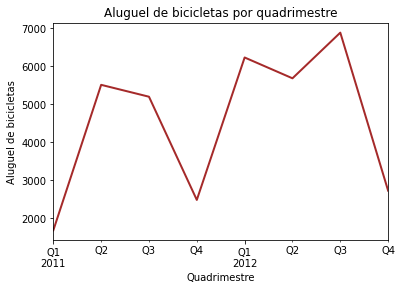

In [ ]:
bike['cnt'].asfreq('Q').plot(linewidth = 2, color = 'brown')
plt.title('Aluguel de bicicletas por quadrimestre')
plt.xlabel('Quadrimestre')
plt.ylabel('Aluguel de bicicletas');

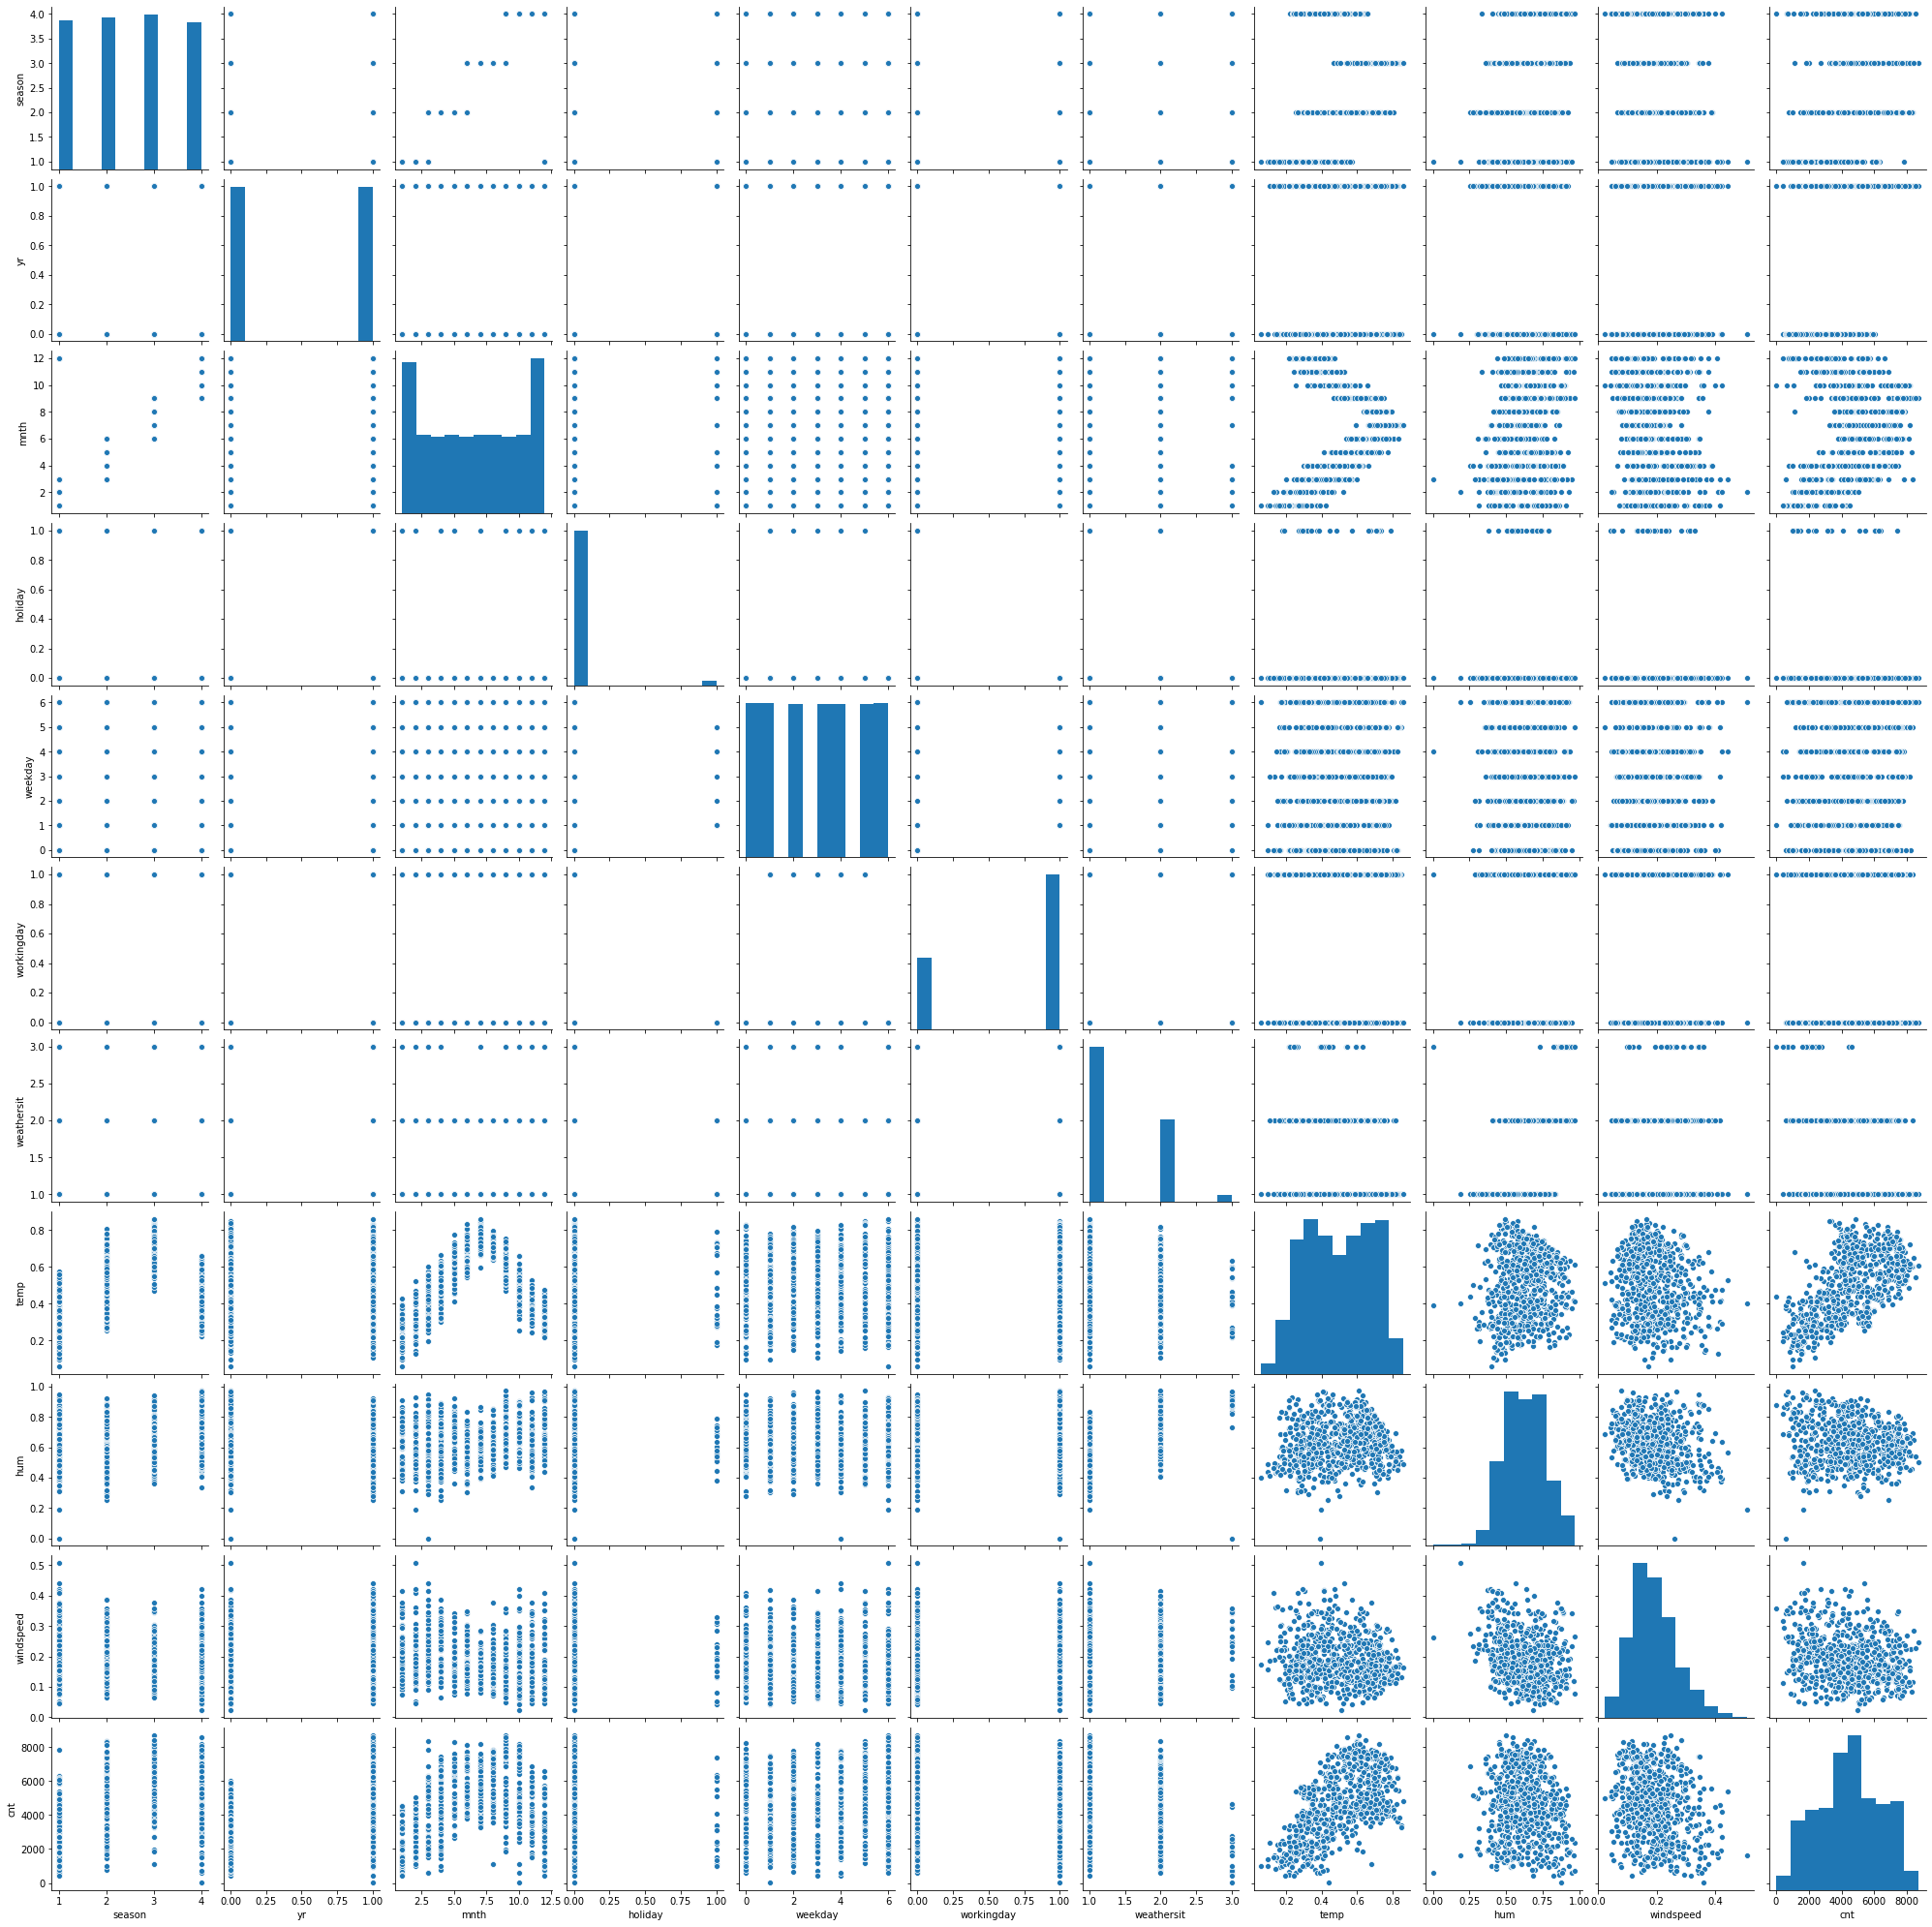

In [ ]:
# Visualização para os pares de features da base de dados
sns.pairplot(bike);

In [ ]:
# Atribuir a variável X todas as features númericas da base de dados
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [ ]:
# Visualizar o DataFrame X somente com as features númericas
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


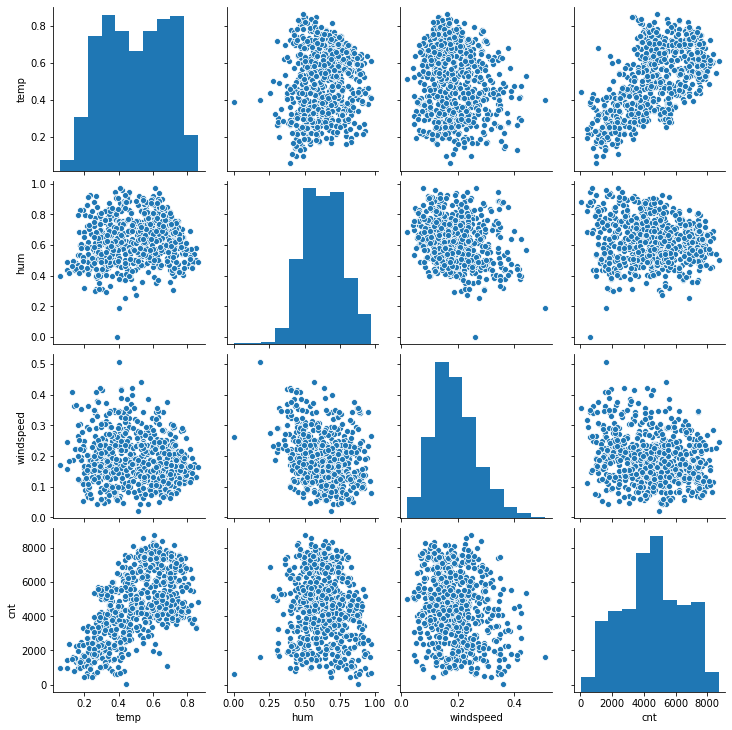

In [ ]:
# Visualização para os pares de features númericas
sns.pairplot(X_numerical);

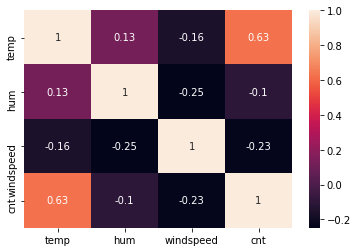

In [ ]:
# Heatmap para verificação de correlação entre as features
sns.heatmap(X_numerical.corr(), annot = True);

Podemos observar que existe uma correlação entre a temperatura com a quantidade de aluguéis de bicicleta.

###**Etapa 5: Tratamento das bases de dados**

In [ ]:
# Atribuir a variável X_cat todas as features categóricas da base de dados
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_cat
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [ ]:
# Aplicar OneHotEncoder nas features categóricas para transformá-las em valores númericos
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
# Visualizar o array transformado
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# Visualizar a estrutura do array
X_cat.shape

(731, 32)

Temos então, 32 colunas e 731 linhas.

In [ ]:
# Convertemos o array X_cat para uma DataFrame
X_cat = pd.DataFrame(X_cat)

In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_cat
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_Numerical
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


In [ ]:
# Criação de um novo índice para o DataFrame X_Numerical
X_numerical = X_numerical.reset_index()

In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_Numerical
X_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [ ]:
# União dos DataFrames X_Numerical e X_cat 
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_all
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [ ]:
# Deletar a coluna 'dteday' do DataFrame X_all
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros do DataFrame X_all
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [ ]:
# Criação da variável X com as features preditoras, ou seja, todas as features exceto 'cnt'
X = X_all.iloc[:, :-1].values

In [ ]:
# Criação da variável y com os valores que desejamos prever, ou seja, apenas 'cnt'
y = X_all.iloc[:, -1:].values

In [ ]:
# Verificar a estrutura de X
X.shape

(731, 35)

In [ ]:
# Verificar a estrutura de Y
y.shape

(731, 1)

In [ ]:
# É necessário normalizar os dados de y (valor que desejamos prever), para isso, utilizamos MinMaxScaler para normalizarmos os valores em uma escala entre 0 a 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [ ]:
# Visualizar os dados de y
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [ ]:
# Divisão da base de dados para treinamento e teste. Sendo 80% para treinamento e 20% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Visualizar estrutura de X_train
X_train.shape

(584, 35)

Temos 584 registros para realizarmos o treinamento.

In [ ]:
# Visualizar estrutura de X_teste
X_test.shape

(147, 35)

Temos 147 registros para realizarmos o teste.

###**Etapa 6 - Construção e treinamento do modelo**

In [ ]:
# Criação da rede neural artificial

# Criação de um modelo sequencial de camadas
model = tf.keras.models.Sequential()

# Aplicação de 100 camadas ocultas, função de ativação ReLu e 35 valores de entrada.
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))

# Aplicação de 100 camadas ocultas e  a função de ativação Relu.
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Aplicação de 100 camadas ocultas e a função de ativação ReLu.
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Aplicação de 1 valor de saída e a função de ativação Linear.
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# 35 -> 100 -> 100 -> 100 -> 1

In [ ]:
# Visualização do sumário da RNA criada
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilação do modelo com o algoritmo de otimização Adam (Gradiente Descendente Estocástico) e a função de custo MSE (Mean Squared Error)
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
# Treinamento da RNA

# Armazenamos o histórico das epócas em uma variável epochs_hist;
# Atribuimos 25 epócas para o treinamento do modelo;
# Indicamos batch_size de 50, ou seja, o cálculo do erro será executado após 50 registros para atualização dos pesos;
# Utilizamos 20% dos dados para realizarmos a validação cruzada.

epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 0s 21ms/step - loss: 0.2250 - val_loss: 0.0989
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0599 - val_loss: 0.0382
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0298 - val_loss: 0.0243
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.0210
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0168
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0152
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0138
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0134
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0128
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0123
Epoch 11/25
10/10 

###**Etapa 7 - Avaliação do modelo** 

In [ ]:
# Visualizar o dicionário de epochs_hist
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

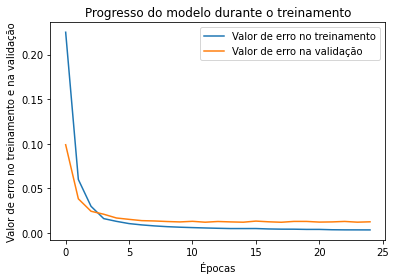

In [ ]:
# Visualizar o valor de erro na base de dados de treinamento e na base de dados de validação
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Progresso do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('V,rro no treinamento e na validação')
plt.legend(['Valor de erro no treinamento', 'Valor de erro na validação']);

In [ ]:
# Previsão com a base de dados de teste
y_predict = model.predict(X_test)

In [ ]:
# Visualizar as previsões com a base de teste
y_predict

array([[0.88015294],
       [0.8654907 ],
       [0.5213384 ],
       [0.4792509 ],
       [0.61263263],
       [0.5602589 ],
       [0.75805885],
       [0.81444806],
       [0.39650118],
       [0.43566346],
       [0.5038409 ],
       [0.60517716],
       [0.18275277],
       [0.3365885 ],
       [0.81187654],
       [0.41609544],
       [0.5790431 ],
       [0.4782911 ],
       [0.80873805],
       [0.85502356],
       [0.42518193],
       [0.47874135],
       [0.88513744],
       [0.13052621],
       [0.43999588],
       [0.18077883],
       [0.41261053],
       [0.54695815],
       [0.137254  ],
       [0.2596556 ],
       [0.4381274 ],
       [0.29447305],
       [0.29383838],
       [0.755649  ],
       [0.46121585],
       [0.15181078],
       [0.8092238 ],
       [0.52465326],
       [0.59487236],
       [0.29641753],
       [0.25936425],
       [0.82952654],
       [0.31117797],
       [0.57701457],
       [0.37006032],
       [0.3934493 ],
       [0.44334716],
       [0.256

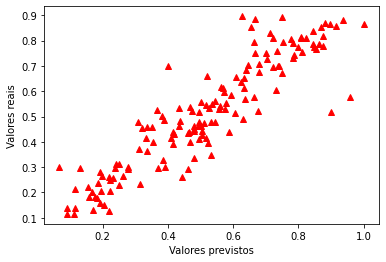

In [ ]:
# Visualizar os dados previstos vs dados reais para fins de comparação
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais');

In [ ]:
# Desfazer a normalização dos dados em y_predict e y_test
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

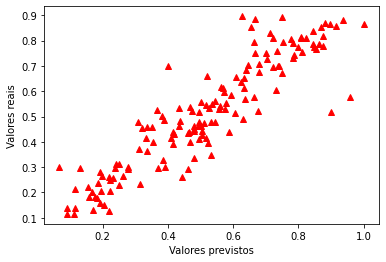

In [ ]:
# Visualizar os dados previstos vs dados reais com os valores na escala original 
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais');

**Cálculo de métricas de avaliação do modelo**

In [ ]:
# Definimos k como o número de features da base de dados de teste
k = X_test.shape[1]
k

35

In [ ]:
# Definimos n como a quantidade de registros da base de dados de teste
n = len(X_test)
n

147

In [ ]:
# Importação das métricas de avaliação atráves de sklearn.metrics;
# Importação sqrt para executarmos a raiz quadrada;
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# Cálculo das métricas
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)

# Utilizamos k e n para calcularmos o R2 Ajustado:
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [ ]:
# Visualização das métricas do modelo
print("MAE (Mean Absolute Error): ", mae, "\nMSE (Mean Squared Error): ", mse, "\nRMSE (Root Mean Squared Error): ", rmse, "\nR2 (Coeficiente de determinação): ", r2, "\nR2 Ajustado: ", adj_r2)

MAE (Mean Absolute Error):  0.06876426184451341 
MSE (Mean Squared Error):  0.009160933849238962 
RMSE (Root Mean Squared Error):  0.09571276743067751 
R2 (Coeficiente de determinação):  0.8258527540659605 
R2 Ajustado:  0.7709414603029751
